In [57]:
#importa as bibliotecas necessárias, a documentação do VAR está em http://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import cufflinks as cf
cf.go_offline()



**1) Importe para o R os dados do arquivo “dados_01.csv” e converta as variáveis acima
para séries de tempo usando o comando “ts”. **

com os comandos abaixo importamos o arquivo excel e convertemos o índice do dataframe em uma série de períodos mensais.

In [3]:
#dados importados e dispostos como time-series
data = pd.read_csv('dados_01.csv',sep=';', decimal=',', skiprows=1,names=['DATA', 'SELIC','UTCAP','INF','EXPINF'], index_col=0) #le a planilha
data.index = data.index.map(lambda i: pd.Period(year=int(i), month=(i % 1 * 100), freq='M').to_timestamp()) #converte o indice em períodos mensais
data.head() #exibe os 5 primeiros valores


SELIC  UTCAP   INF  EXPINF
DATA                                  
2002-12-01   25.0   80.4  2.25   11.72
2003-01-01   25.5   80.2  1.57   11.07
2003-02-01   26.5   79.7  1.23    9.90
2003-03-01   26.5   79.7  0.97    9.18
2003-04-01   26.5   79.9  0.61    8.23

** 2)Gere gráficos de cada série. Comente sobre a possível estacionariedade dos
respectivos PGD’s. **

In [9]:
data.iplot(kind='line',subplots=True, subplot_titles=list(data.columns), title='Dataset para este exercício.')

das quatro varíaveis, a única que demonstra uma possível estacionariedade para o período tode é INF.

**3) Estime um modelo VAR(1) para essas variáveis. Verifique se o VAR estimado é
estacionário. A partir do VAR estimado:**

In [10]:
#criamos um modelo VAR(1) a partir dos dados e exibimos o resultado da regressão
model= VAR(data)
results = model.fit(maxlags=1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Sep, 2017
Time:                     23:38:14
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.96690
Nobs:                     173.000    HQIC:                  -9.18355
Log likelihood:          -154.735    FPE:                8.85996e-05
AIC:                     -9.33145    Det(Omega_mle):     7.90563e-05
--------------------------------------------------------------------
Results for equation SELIC
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -6.440124         1.463968           -4.399           0.000
L1.SELIC          0.962225         0.008688          110.759           0.000
L1.UTCAP          0.072478         0.017159            4.224           0.000

**a. Realize previsões de todas as variáveis 12 passos à frente.**


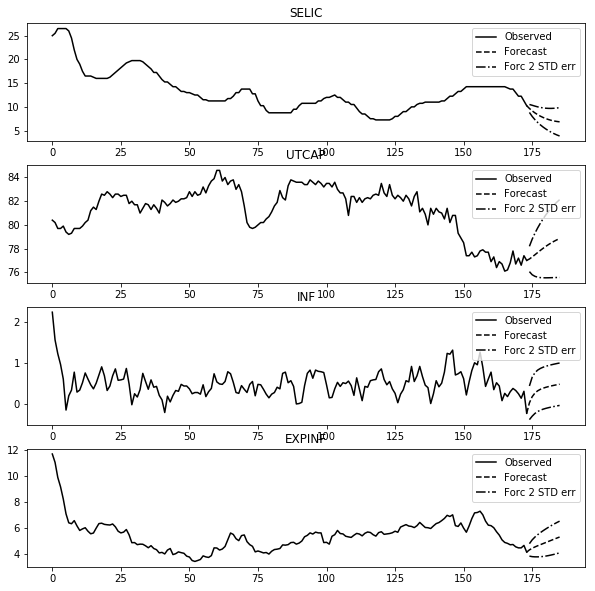

In [11]:
results.plot_forecast(12)

**b. Calcule as FRI’s do modelo por meio do método da decomposição de Cholesky**

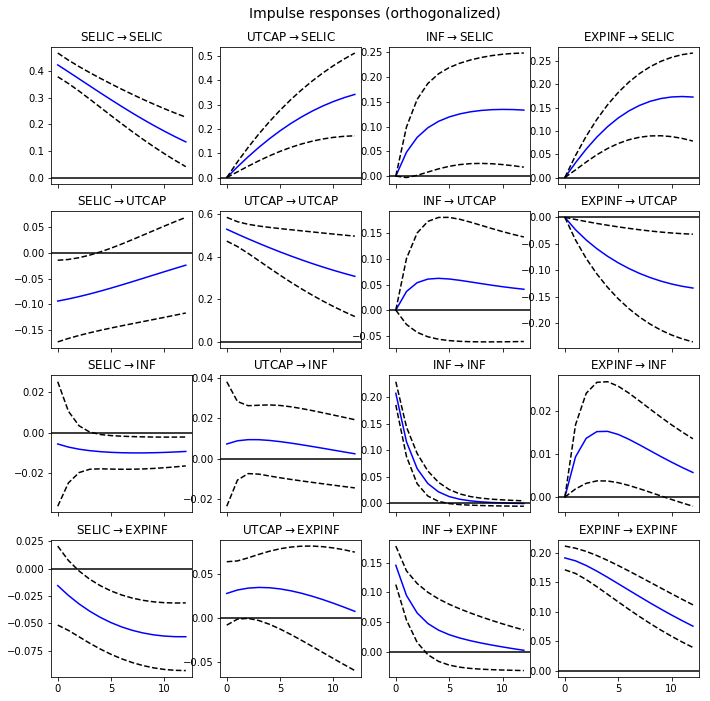

In [12]:
ifr = results.irf(12)
ifr.plot(orth=True)

**c. Teste a existência de causalidade de Granger entre INF e EXPINF (nos dois sentidos).**

In [13]:
print('************ Teste para EXPINF Granger-cause INF: ************\n')
results.test_causality('INF','EXPINF')



print('\n***************** Teste  no sentido oposto: *****************\n')
results.test_causality('EXPINF','INF')

print('') #omite saída desta célula

************ Teste para EXPINF Granger-cause INF: ************

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         6.169247         3.855334            0.013  (1, 672L)
H_0: ['EXPINF'] do not Granger-cause INF
Conclusion: reject H_0 at 5.00% significance level

***************** Teste  no sentido oposto: *****************

Granger causality f-test
   Test statistic   Critical Value          p-value         df
--------------------------------------------------------------
         7.747817         3.855334            0.006  (1, 672L)
H_0: ['INF'] do not Granger-cause EXPINF
Conclusion: reject H_0 at 5.00% significance level



**4) Estime agora um modelo VAR(2) para as mesmas variáveis. Repita os procedimentos
(a)-(c) dos itens anteriores. Compare os resultados.**

In [14]:
#criamos um modelo VAR(1) a partir dos dados e exibimos o resultado da regressão
model_2= VAR(data)
results_2 = model_2.fit(maxlags=2)
results_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Sep, 2017
Time:                     23:38:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -9.09450
Nobs:                     172.000    HQIC:                  -9.48600
Log likelihood:          -101.448    FPE:                5.81260e-05
AIC:                     -9.75328    Det(Omega_mle):     4.73991e-05
--------------------------------------------------------------------
Results for equation SELIC
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -2.873962         1.319346           -2.178           0.031
L1.SELIC          1.476583         0.066357           22.252           0.000
L1.UTCAP          0.114241         0.052301            2.184           0.030

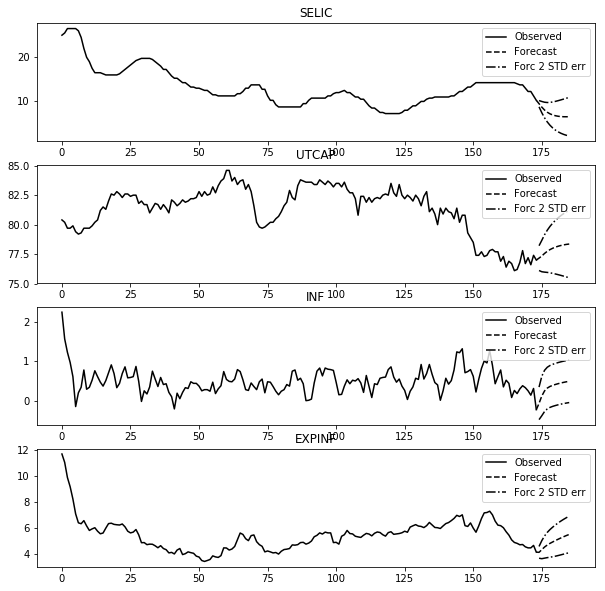

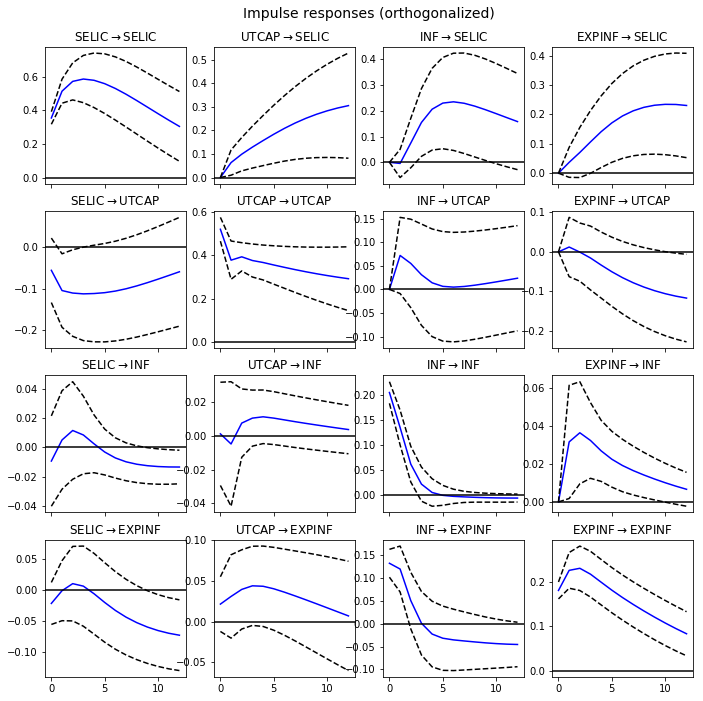

In [15]:
results_2.plot_forecast(12)
ifr_2 = results_2.irf(12)
ifr_2.plot(orth=True)

**ATIVIDADE 2**

Considere o modelo de transmissão monetária da Aula 2, slide 16, com 𝜆 = 0.5, 𝜌 = 3, 𝛾 =
−0.5, 𝑖∗ = 4, 𝜋∗ = 4, 𝜎1
2 = 1, 𝜎2
2 = 1, 𝜎12
2 = 0.5.
<br>
1. Gere 1000 amostras de tamanho 200 dos choques estruturais, da inflação e do hiato do
produto. Para cada amostra, estime as seguintes equações:
𝜋𝑡 = 𝛽0 + 𝛽1𝑦𝑡 + 𝛽2𝜋𝑡−1 + 𝜀𝑡 (1) <br>
𝜋𝑡 = 𝛽0 + 𝛽1𝑦𝑡−1 + 𝛽2𝜋𝑡−1 + 𝜀𝑡 (2) <br>

In [105]:
gamma = 0.5
ro = 3
delta  = -0.5
i_star = 4
pi_star = 4
var_1 = 1
var_2 = 1
var_12 = 0.5

sigma = [[var_1**2, var_12*var_1*var_2],[0,var_2**2]]

def pi(y,pi_1,u1):
    return gamma*y+pi_1+u1

def y(pi_1,u2):
    return delta*(i_star - ro * pi_star) + delta * (ro - 1) * pi_1 + u2

sim_data = {}

for i in range (1000):
    y_1, pi_1 = y(pi_star,0),pi_star #valores iniciais para y(t-1) e pi(t-1)
    loop_holder = [(0,0,y_1,pi_1)] #armazena uma simulação de 200 séries
    
    for j in range(1,200):
        u1,u2 = pd.np.random.multivariate_normal([0,0], sigma)
        y_t = y(pi_1,u2)
        pi_t = pi(y_t,pi_1,u1)
        loop_holder.append((u1,u2,y_t,y_1,pi_t,pi_1))
        y_1, pi_1 = y_t, pi_t
    
    sim_df = pd.DataFrame(loop_holder, columns = ['U1','U2','Y','Y_1','PI','PI_1']) #armazena 200 séries em uma simulação
    sim_data[(i,'EQ.1')] = sm.ols('PI ~ Y + PI_1', data=sim_df).fit().params #faz a regressão da eq.1
    sim_data[(i,'EQ.2')] = sm.ols('PI ~ Y_1 + PI_1', data=sim_df).fit().params #faz a regressão da eq.2
    
sim_data = pd.concat(sim_data, axis=1).T.unstack() #concatena 1000 simulações de 200 séries cada.
plotdf = sim_data[[('Y','EQ.1'),('PI_1','EQ.1'),('Y_1','EQ.2'),('PI_1','EQ.2')]]
plotdf.columns = ['B1_EQ.1', 'B2_EQ.1','B1_EQ.2','B2_EQ.2']
plotdf.iplot(subplots=True, kind='hist')

In [106]:
gamma = 0.5
ro = 3
delta  = -0.5
i_star = 4
pi_star = 4
var_1 = 1
var_2 = 1
var_12 = 0.0 #variável agora é 0

sigma = [[var_1**2, var_12*var_1*var_2],[0,var_2**2]]

def pi(y,pi_1,u1):
    return gamma*y+pi_1+u1

def y(pi_1,u2):
    return delta*(i_star - ro * pi_star) + delta * (ro - 1) * pi_1 + u2

sim_data = {}

for i in range (1000):
    y_1, pi_1 = y(pi_star,0),pi_star #valores iniciais para y(t-1) e pi(t-1)
    loop_holder = [(0,0,y_1,pi_1)] #armazena uma simulação de 200 séries
    
    for j in range(1,200):
        u1,u2 = pd.np.random.multivariate_normal([0,0], sigma)
        y_t = y(pi_1,u2)
        pi_t = pi(y_t,pi_1,u1)
        loop_holder.append((u1,u2,y_t,y_1,pi_t,pi_1))
        y_1, pi_1 = y_t, pi_t
    
    sim_df = pd.DataFrame(loop_holder, columns = ['U1','U2','Y','Y_1','PI','PI_1']) #armazena 200 séries em uma simulação
    sim_data[(i,'EQ.1')] = sm.ols('PI ~ Y + PI_1', data=sim_df).fit().params #faz a regressão da eq.1
    sim_data[(i,'EQ.2')] = sm.ols('PI ~ Y_1 + PI_1', data=sim_df).fit().params #faz a regressão da eq.2
    
sim_data = pd.concat(sim_data, axis=1).T.unstack() #concatena 1000 simulações de 200 séries cada.
plotdf = sim_data[[('Y','EQ.1'),('PI_1','EQ.1'),('Y_1','EQ.2'),('PI_1','EQ.2')]]
plotdf.columns = ['B1_EQ.1', 'B2_EQ.1','B1_EQ.2','B2_EQ.2']
plotdf.iplot(subplots=True, kind='hist')